In [35]:
!pip install matplotlib
!pip install scikit-learn
!pip install seaborn


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [36]:
# Q1. Pandas version
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [37]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv

--2024-10-07 22:10:54--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 298573 (292K) [text/plain]
Saving to: ‘laptops.csv.4’

laptops.csv.4       100%[===================>] 291.58K  --.-KB/s    in 0.07s   

2024-10-07 22:10:54 (4.17 MB/s) - ‘laptops.csv.4’ saved [298573/298573]



In [38]:
df = pd.read_csv('laptops.csv')
df.head(5)

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


## **2.1. Preparing the dataset**

In [39]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [40]:
# Select only the necessary columns
df = df[['ram', 'storage', 'screen', 'final_price']]
print(df.head())

   ram  storage  screen  final_price
0    8      512    15.6      1009.00
1    8      256    15.6       299.00
2    8      256    15.6       789.00
3   16     1000    15.6      1199.00
4   16      512    15.6       669.01


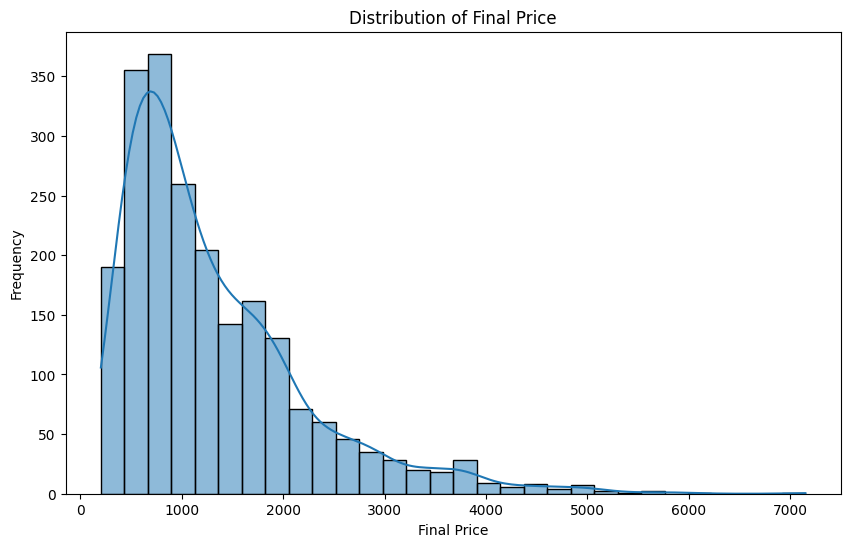

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(df['final_price'], bins=30, kde=True)
plt.title('Distribution of Final Price')
plt.xlabel('Final Price')
plt.ylabel('Frequency')
plt.show()

## **Q1**

In [42]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Display columns with missing values
missing_values[missing_values > 0]

screen    4
dtype: int64

## **Q2**

In [52]:
# Calculate the median for 'ram'
median_ram = df['ram'].median()
print(f'Median RAM: {median_ram}')


Median RAM: 16.0


## **Q3**

In [46]:
# Shuffle the dataset with seed 42
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

# Reset index
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# Extract the target variable (final_price)
y_train = df_train['final_price'].values
y_val = df_val['final_price'].values
y_test = df_test['final_price'].values

# Remove the target from the feature set
del df_train['final_price']
del df_val['final_price']
del df_test['final_price']


### Q3.1 Filling NAs With 0

In [48]:
# Fill missing values with 0
df_train_0 = df_train.fillna(0)
df_val_0 = df_val.fillna(0)

# Linear Regression without regularization
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Train the model
model_0 = LinearRegression()
model_0.fit(df_train_0, y_train)

# Predict on validation set
y_pred_0 = model_0.predict(df_val_0)

# Calculate RMSE
rmse_0 = mean_squared_error(y_val, y_pred_0, squared=False)
print(f'RMSE (fill with 0): {round(rmse_0, 2)}')


RMSE (fill with 0): 642.38


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Q3.1 Filling NAs With mean

In [49]:
# Fill missing values with the mean (using training data mean)
mean_value = df_train.mean()

df_train_mean = df_train.fillna(mean_value)
df_val_mean = df_val.fillna(mean_value)

# Train the model
model_mean = LinearRegression()
model_mean.fit(df_train_mean, y_train)

# Predict on validation set
y_pred_mean = model_mean.predict(df_val_mean)

# Calculate RMSE
rmse_mean = mean_squared_error(y_val, y_pred_mean, squared=False)
print(f'RMSE (fill with mean): {round(rmse_mean, 2)}')


RMSE (fill with mean): 642.37


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## **Q4**

In [50]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [53]:
# Fill missing values with 0
df_train_0 = df_train.fillna(0)
df_val_0 = df_val.fillna(0)

In [55]:
# List of r values (alpha)
r_values = [0, 0.01, 0.1, 1, 5, 10, 100]

# Loop over each r value and train Ridge Regression
for r in r_values:
    model_ridge = Ridge(alpha=r)
    model_ridge.fit(df_train_0, y_train)
    
    # Predict on validation set
    y_pred = model_ridge.predict(df_val_0)
    
    # RMSE
    rmse_r = mean_squared_error(y_val, y_pred, squared=False)
    print(f'RMSE for r={r}: {round(rmse_r, 2)}')


RMSE for r=0: 642.38
RMSE for r=0.01: 642.38
RMSE for r=0.1: 642.38
RMSE for r=1: 642.38
RMSE for r=5: 642.37
RMSE for r=10: 642.37
RMSE for r=100: 642.28


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_reg

## **Q5**

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [65]:
def train_and_evaluate_model(df, seed):
    # Shuffle and split the data
    df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=seed)
    df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=seed)
    
    # Reset the index
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    
    # Extract the target variable
    y_train = df_train['final_price'].values
    y_val = df_val['final_price'].values
    
    # Remove the target from the feature set
    X_train = df_train.drop(columns=['final_price']).fillna(0)
    X_val = df_val.drop(columns=['final_price']).fillna(0)
    
    # Train the linear regression model without regularization
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predict on the validation set
    y_pred = model.predict(X_val)
    
    # Calculate RMSE
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    return rmse

# List to hold RMSE scores
rmse_scores = []

# Loop through different seeds and compute RMSE for each
for seed in range(10):
    rmse = train_and_evaluate_model(df, seed)
    rmse_scores.append(rmse)

# Compute the standard deviation of RMSE scores
std_rmse = np.std(rmse_scores)

# Print the result rounded to 3 decimal digits
print(f'Standard Deviation of RMSE: {round(std_rmse, 3)}')


Standard Deviation of RMSE: 24.981


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_reg

## **Q6**

In [67]:
# Step 1: Split the dataset using seed 9
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=9)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=9)

# Step 2: Combine train and validation datasets
df_combined = pd.concat([df_train, df_val], ignore_index=True)

# Step 3: Fill missing values with 0
X_train = df_combined.drop(columns=['final_price']).fillna(0)
y_train = df_combined['final_price'].values

# Step 4: Train a linear regression model with regularization (Ridge regression)
r = 0.001
model = Ridge(alpha=r)
model.fit(X_train, y_train)

# Step 5: Evaluate on the test dataset
X_test = df_test.drop(columns=['final_price']).fillna(0)
y_test = df_test['final_price'].values

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate RMSE on the test dataset
rmse_test = mean_squared_error(y_test, y_pred, squared=False)

# Print the RMSE rounded to two decimal digits
print(f'RMSE on the test dataset: {round(rmse_test, 2)}')

RMSE on the test dataset: 604.63


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
